Read up on p-values, effect sizes, and power here through this [article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3444174/)

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Numpy Array indexing and slicing exercises:

## Simple stats with synthetic data

In [15]:
# set a random number generator initial seed/value
np.random.seed(0)

group1 = np.random.randn(1000)
print(group1.shape)

(1000,)


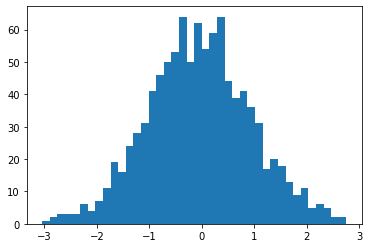

In [18]:
plt.hist(group1, bins=40);

## Effect size and power:

Cohen's D: 

```
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s
```


Your pilot study analyzed with a Student t-test reveals that group 1 (N  =  29) has a mean score of 30.1 (SD, 2.8) and that group 2 (N  =  30) has a mean score of 28.5 (SD, 3.5). The calculated P value  =  .06, and on the surface, the difference appears not significantly different. However, the calculated effect size is 0.5, which is considered “medium” according to Cohen. In order to test your hypothesis and determine if this finding is real or due to chance (ie, to find a significant difference), with an effect size of 0.5 and P of <.05, the power will be too low unless you expand the sample size to approximately N  =  60 in each group, in which case, power will reach .80. For smaller effect sizes, to avoid a Type II error, you would need to further increase the sample size. Online resources are available to help with these calculations.